In [2]:
ls

Analyze design accuracies.ipynb
Check preferred neighbors assignment for golfy 1.5.0.ipynb
Deconvolution.ipynb
Experiment with allow_extra_pools.ipynb
First stab.ipynb
Large numbers of peptides per pool.ipynb
Number of pools and iters for different params.ipynb
Slower second attempt.ipynb
Third swing.ipynb
designs.csv


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("designs.csv")

/Users/iskander/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


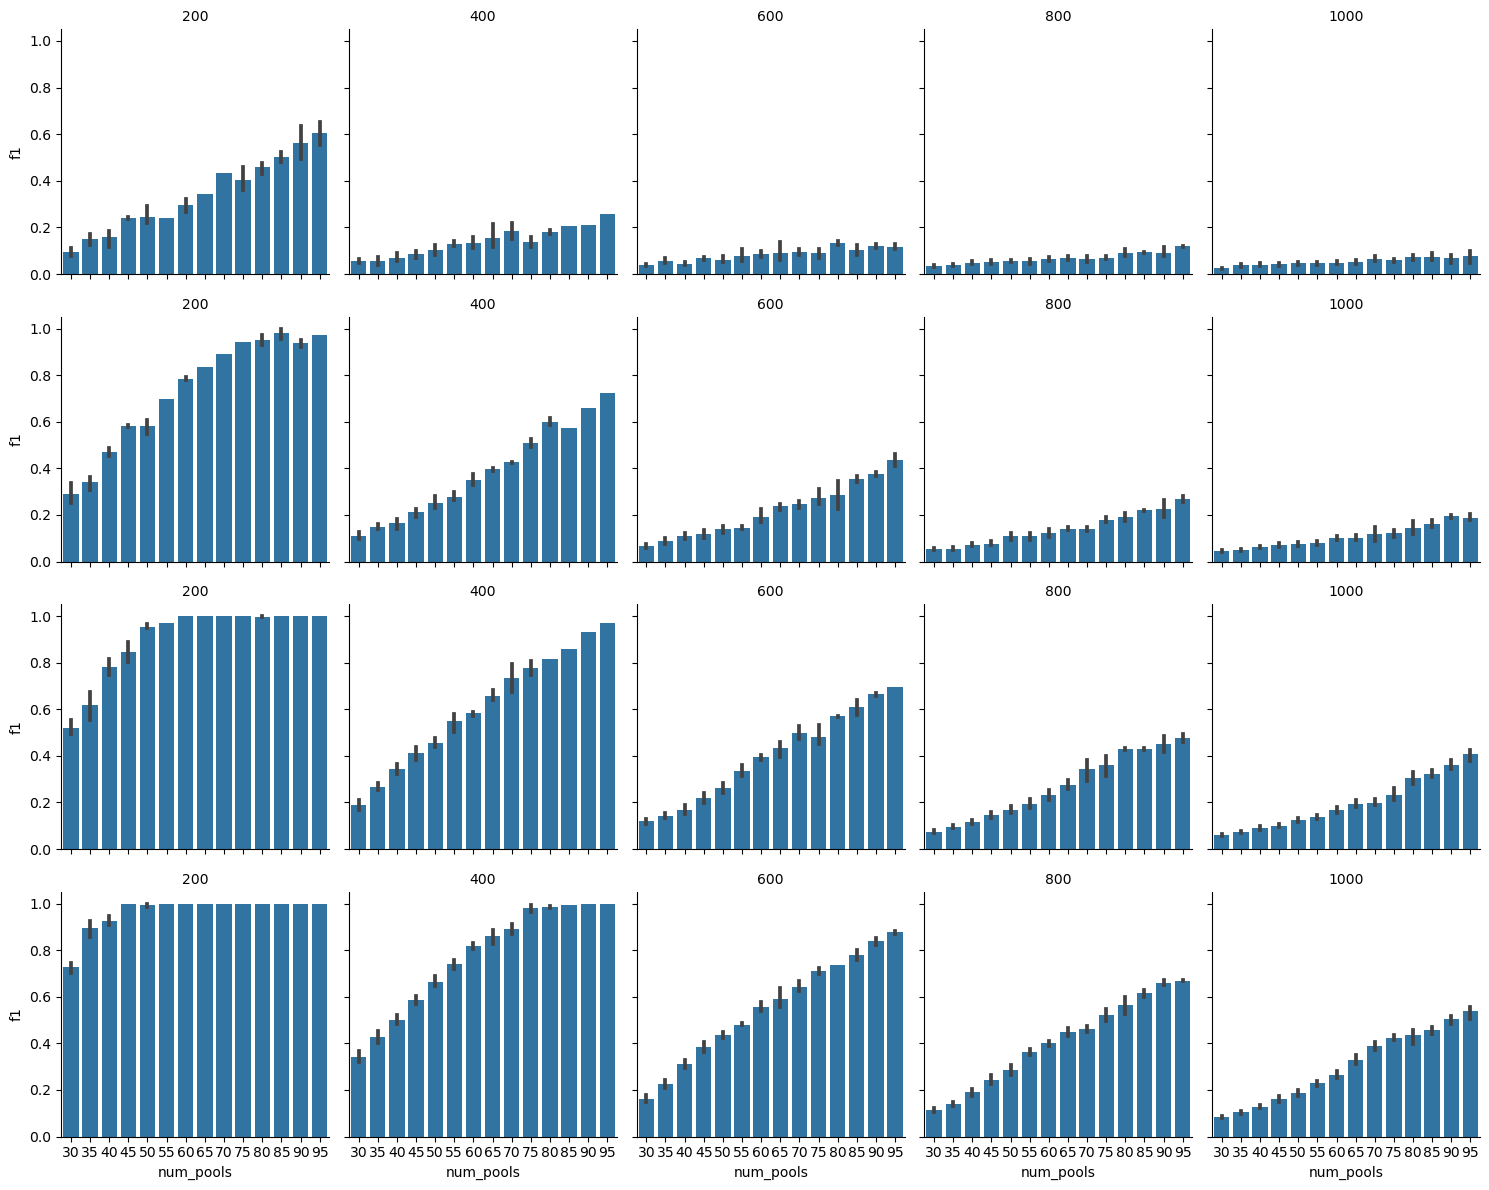

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.barplot, "num_pools", "f1")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()


In [8]:
df

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
0,200,5,2,True,0.961,1.000,0.978,80,0
1,200,5,2,False,1.000,1.000,1.000,80,0
2,200,6,2,True,0.930,0.993,0.956,68,0
3,200,6,2,False,0.946,0.987,0.963,68,0
4,200,7,2,True,0.834,0.949,0.881,58,0
...,...,...,...,...,...,...,...,...,...
3048,1000,199,2,False,0.034,0.015,0.020,12,27630
3049,1000,199,3,True,0.365,0.502,0.418,96,0
3050,1000,199,3,False,0.083,0.054,0.063,18,77328
3051,1000,199,4,False,0.057,0.048,0.051,24,147296


In [25]:
df[(df.num_peptides == 400) & (df.f1 == 1.0)]

,num_peptides,max_peptides_per_pool,num_replicates,allow_extra_pools,precision,recall,f1,num_pools,num_violations
283,400,17,4,False,1.0,1.0,1.0,96,128
289,400,18,4,False,1.0,1.0,1.0,92,54
294,400,19,4,True,1.0,1.0,1.0,93,0
295,400,19,4,False,1.0,1.0,1.0,88,102
306,400,21,4,True,1.0,1.0,1.0,90,0
307,400,21,4,False,1.0,1.0,1.0,80,412
312,400,22,4,True,1.0,1.0,1.0,92,0
314,400,22,5,False,1.0,1.0,1.0,95,1996
319,400,23,4,True,1.0,1.0,1.0,94,0
321,400,23,5,False,1.0,1.0,1.0,90,2532


In [27]:
df_600 = df[df.num_peptides == 600]

In [29]:
df_600_5 = df_600[df_600.num_replicates == 5]


<Axes: xlabel='max_peptides_per_pool', ylabel='f1'>

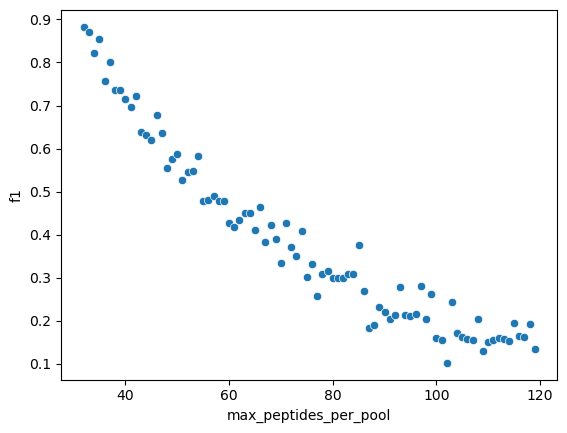

In [31]:
sns.scatterplot(data=df_600_5, x="max_peptides_per_pool", y="f1")

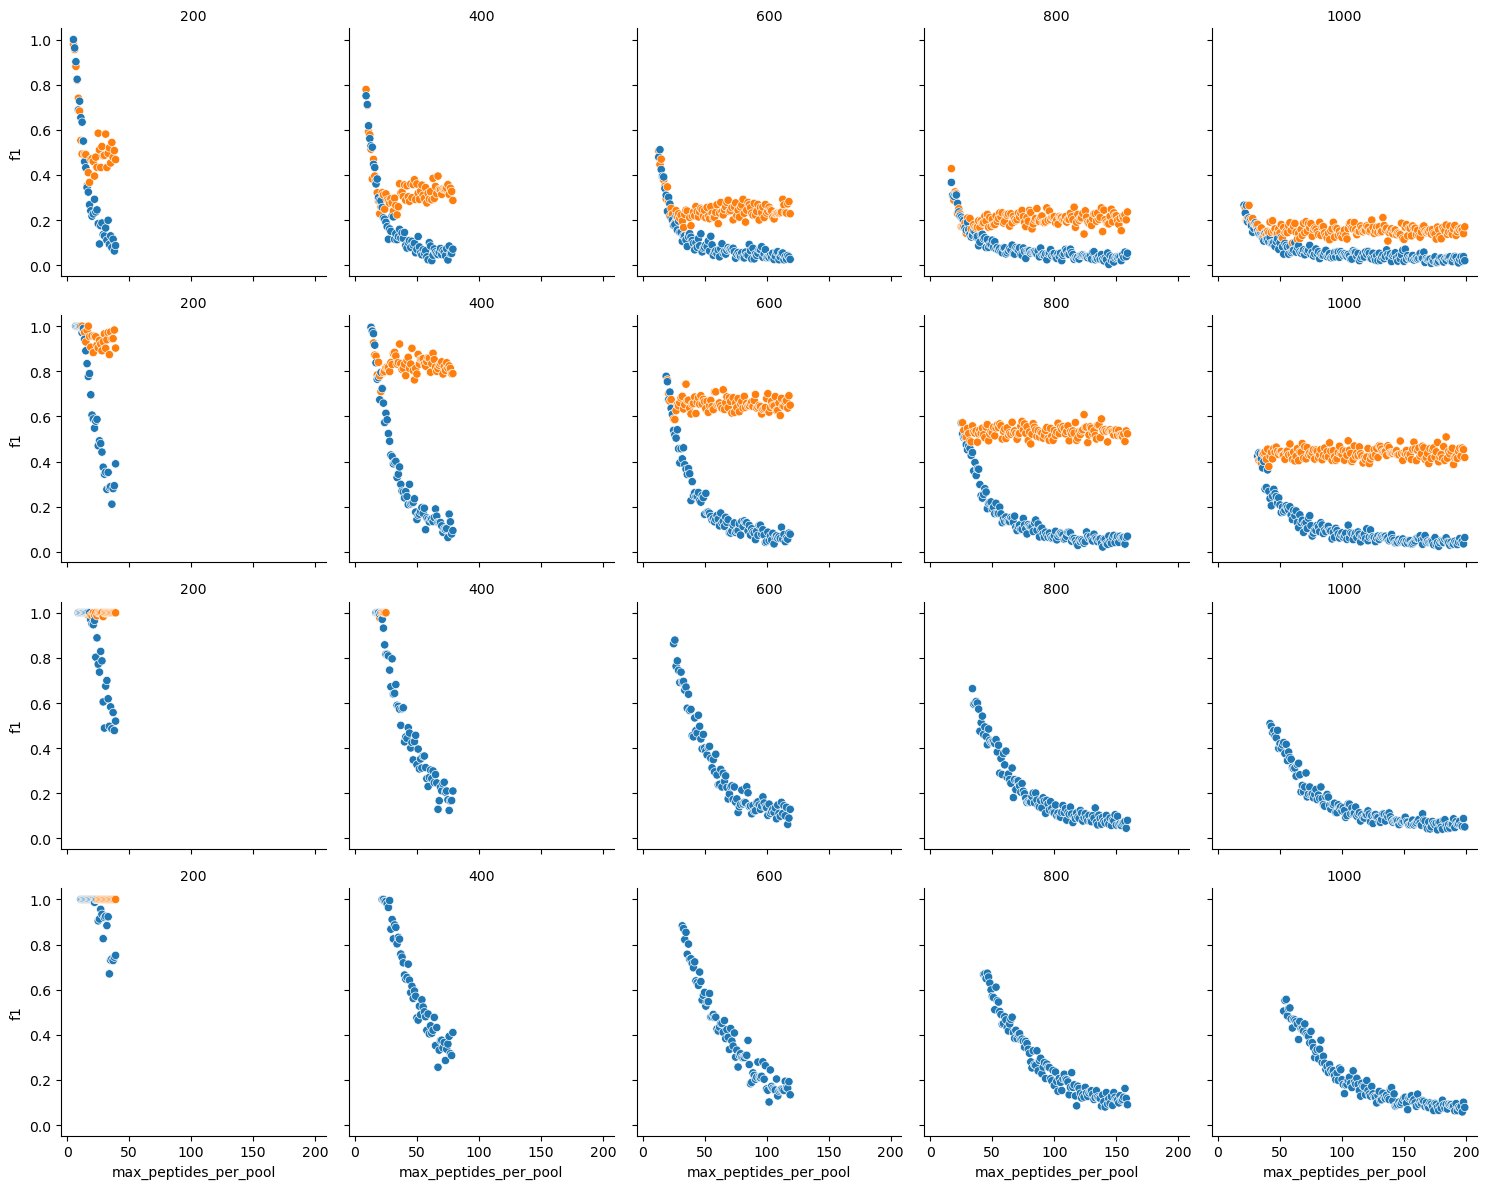

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

grid = sns.FacetGrid(df,  row="num_replicates", col="num_peptides", col_order=[200, 400, 600, 800, 1000])
bp = grid.map(sns.scatterplot, "max_peptides_per_pool", "f1", "allow_extra_pools")
# bp.add_legend()
bp.set_titles("{col_name}")

plt.show()